# Introduction

The goal of this project is to determine how dimensionality reduction and clustering algorithms allow one to gain insight with data. First I will use  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import umap
import scipy
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import fetch_openml
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn import datasets, metrics
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sklearn
sklearn.__version__

'0.21.2'

# Dimensionality Reduction

In [3]:
#Dimensionality Reduction with PCA

In [4]:
import sklearn
sklearn.__version__

'0.21.2'

In [5]:
df = pd.read_excel(r'F:\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.xlsx')

In [6]:
np.random.seed(123)

X = df.DailyRate / 255.0
y = df.DistanceFromHome

print(X.shape, y.shape)

(1470,) (1470,)


ValueError: cannot reshape array of size 1 into shape (28,28)

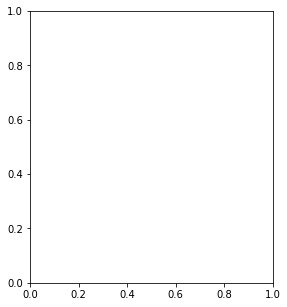

In [7]:
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[123]))

plt.subplot(142)
plt.imshow(X[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[124]))

plt.subplot(143)
plt.imshow(X[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[125]))

plt.subplot(144)
plt.imshow(X[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[126]))

plt.show()

In [ ]:
pca = PCA(n_components=2)

pca_components = pca.fit_transform(X)

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
#Dimensionality Reduction with t-SNE

In [ ]:
df = pd.read_excel(r'F:\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.xlsx')

In [ ]:
np.random.seed(123)

indices = np.random.choice(70000,10000)
X = df.DailyRate[indices] / 255.0
y = df.DistanceFromHome[indices]

print(X.shape, y.shape)

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
#Dimensionality reduction with UMAP

In [ ]:
df = pd.read_excel(r'F:\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.xlsx')

In [ ]:
np.random.seed(123)

indices = np.random.choice(70000,10000)
X = df.DailyRate[indices] / 255.0
y = df.DistanceFromHome[indices]

print(X.shape, y.shape)

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i], color=colours[int(y[i])], fontdict={'weight': 'bold', 'size': 50})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# Clustering

In [ ]:
#Evaluating Clusters

In [ ]:
df = pd.read_excel(r'F:\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.xlsx')
X = df.DailyRate
y = df.DistanceFromHome

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(X_std, X_pca, test_size=0.5, random_state=13579)

In [ ]:
ypred = pd.DataFrame()

for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

In [ ]:
cluster for in range(2, 5):
    
    f, axarr = plt.subplots(1, 2)
    
    for i in range(2):
        
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [ ]:
full_pred = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)

pd.crosstab(y, full_pred) 

In [ ]:
def rand_index_score(grount_truths, predictions):
    tp_plus_fp = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    tp_plus_fn = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    A = np.c_[(grount_truths, predictions)]
    tp = sum(scipy.special.comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(grount_truths))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = scipy.special.comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

In [ ]:
rand_index_score(y, full_pred)

In [ ]:
metrics.adjusted_rand_score(y, full_pred)

In [ ]:
labels = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

In [ ]:
# Hierarchical Clustering

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)

clusters = agg_cluster.fit_predict(X_std)

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

In [ ]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

In [ ]:
# DBSCAN Approach to Clustering

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

clusters = dbscan_cluster.fit_predict(X_std)

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

In [ ]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

In [ ]:
# Clustering with Gaussian Mixture Models (GMM)

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

clusters = gmm_cluster.fit_predict(X_std)

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

In [ ]:
clusters = np.array([2 if x == 1 else 1 if x==0 else 0 for x in clusters])

pd.crosstab(y,clusters)

In [ ]:
probs = gmm_cluster.predict_proba(X_std)

size = 50 * probs.max(1) ** 2  

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': size[i]}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# Summary